In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import datascience as dt
%matplotlib widget

In [35]:
directory_path = '/Users/ti602/Desktop/geant4-xenon/build/output'

In [92]:
def read_csv_files_into_dataframe(directory_path):

    header  = ['EventID','TrackID','Particle','EnergyDeposited','XPosition','YPosition','ZPosition','LocalTime','Volume','Initial Energy']
    # Get a list of all files in the given directory
    file_list = os.listdir(directory_path)
    
    # Filter the list to include only CSV files
    csv_files = [file for file in file_list if file.endswith('.csv')]
    
    # Initialize an empty DataFrame to store the combined data
    combined_dataframe = pd.DataFrame()
    
    # Loop through each CSV file and read it into a DataFrame, then concatenate it to the combined DataFrame
    for csv_file in csv_files:
        file_path = os.path.join(directory_path, csv_file)
        df = pd.read_csv(file_path, skiprows = 14, names = header)
        combined_dataframe = pd.concat([combined_dataframe, df], ignore_index=True)
    
    return combined_dataframe

combined_df = read_csv_files_into_dataframe(directory_path)
combined_df = dt.Table.from_df(combined_df)

# Now, the 'combined_df' variable holds the pandas DataFrame with data from all CSV files.


In [93]:
combined_df

EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy
2007,12,e-,8.45025e-25,-2.5,-1.79771,0.698674,0.605047,physSiliconSubstrate,22.4789
2021,32,alpha,8.44753e-23,-2.5,1.41858,1.27861,2.88073,physSiliconSubstrate,6288.05
2040,35,e-,2.57454e-25,-2.5,-0.883181,1.33174,0.266008,physSiliconSubstrate,158.745
2056,27,e-,2.63161e-24,-2.5,-2.10488,-2.16597,1.70028,physSiliconSubstrate,3.11129
2138,35,e-,5.93358e-24,0.163755,-2.10635,-2.5,2.18971,physSiliconSubstrate,3.69259
2138,35,e-,1.1044e-27,0.16332,-2.10635,-2.50015,2.18973,physSiliconOxide1,3.69259
2138,35,e-,3.68133e-27,0.161871,-2.10636,-2.50065,2.1898,physSiliconNitride1,3.69259
2200,46,e-,6.16867e-25,-2.5,1.9426,0.289621,0.431969,physSiliconSubstrate,48.5191
2302,26,e-,1.4389e-24,-2.5,-0.359375,-1.59342,0.680062,physSiliconSubstrate,32.1369
2425,42,gamma,0,-2.19326,-0.993654,-2.5,0.186659,physSiliconSubstrate,727.329


In [101]:
gamma = combined_df.where('Particle', dt.are.containing('gamma'))
# gamma = gamma.where('EnergyDeposited', dt.are.not_equal_to(0))
# gamma = gamma.where('Initial Energy', dt.are.below_or_equal_to(500))
gamma

EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy


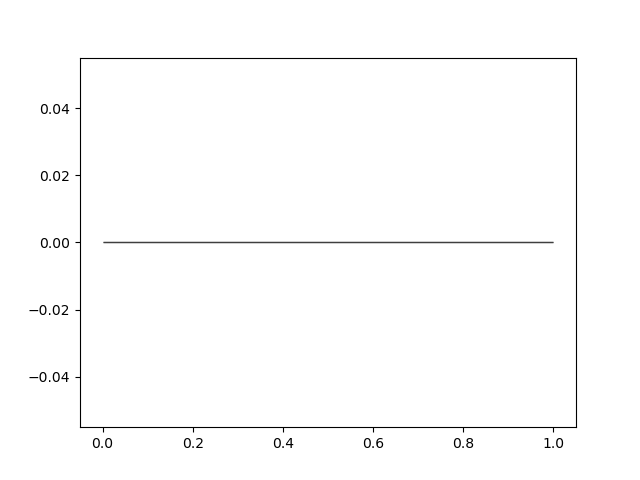

In [102]:
plt.clf()
plt.hist(gamma['Initial Energy'], bins = 500)
# plt.xscale('log')
# plt.xlim(1,)
plt.show()